In [28]:
import numpy as np
import pandas as  pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
DF_AutoMob = pd.read_csv('CarPrice_Assignment.csv')

In [59]:
DF_AutoMob.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [31]:
DF_AutoMob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [60]:
DF_AutoMob.shape

(205, 26)

In [33]:
DF_AutoMob.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


###  Data Cleaning

In [61]:
companyName = DF_AutoMob['CarName'].apply(lambda x : x.split(' ')[0])
companyName.head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarName, dtype: object

In [62]:
DF_AutoMob.insert(3,"companyName",companyName)
DF_AutoMob.drop(['CarName'],axis=1,inplace=True)
DF_AutoMob.head()

,car_ID,symboling,companyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [63]:
DF_AutoMob.companyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### there are some repetetive company names and some names are mispelled

####  vokswagen, volkswagen , vw are all same
####  porsche = porcshce
####  toyota = toyouta are all same

In [64]:
DF_AutoMob.companyName = DF_AutoMob.companyName.str.lower()

#function for replacing the name
def replace_nam(a,b):
    DF_AutoMob.replace(a,b, inplace= True)

In [65]:
replace_nam('toyouta','toyota')
replace_nam('vokswagen','volkswagen')
replace_nam('vw','volkswagen')
replace_nam('maxda','mazda')
replace_nam('porcshce','porsche')

In [66]:
DF_AutoMob.companyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

#### checking duplicates

In [67]:
DF_AutoMob.loc[DF_AutoMob.duplicated()]

,car_ID,symboling,companyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [41]:
DF_AutoMob.columns

Index(['car_ID', 'symboling', 'companyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### visualising data

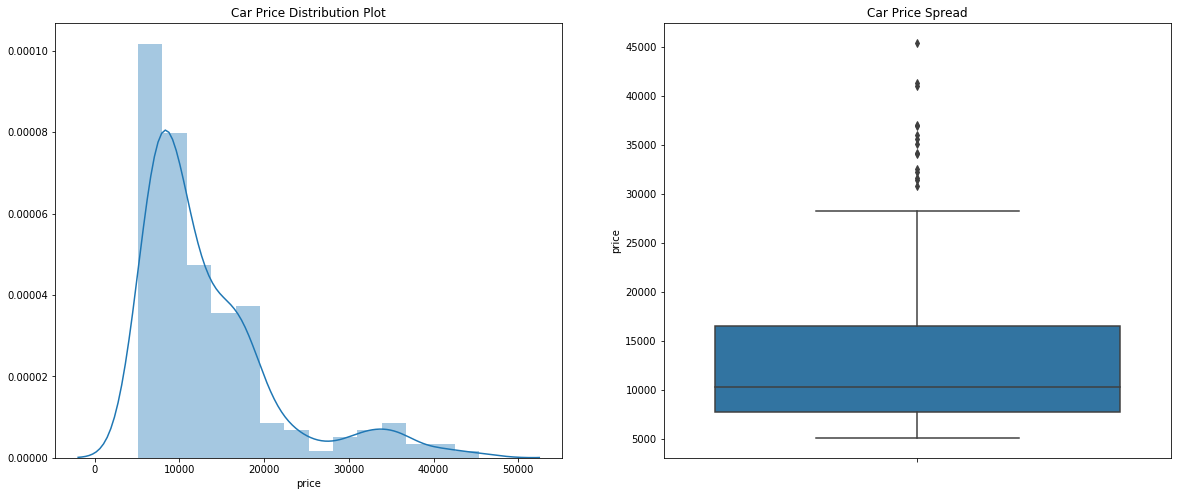

In [68]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(DF_AutoMob.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=DF_AutoMob.price)

plt.show()


In [69]:
DF_AutoMob.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

#### quite a large difference between mean and median
#### 75% of the prices are below 16503

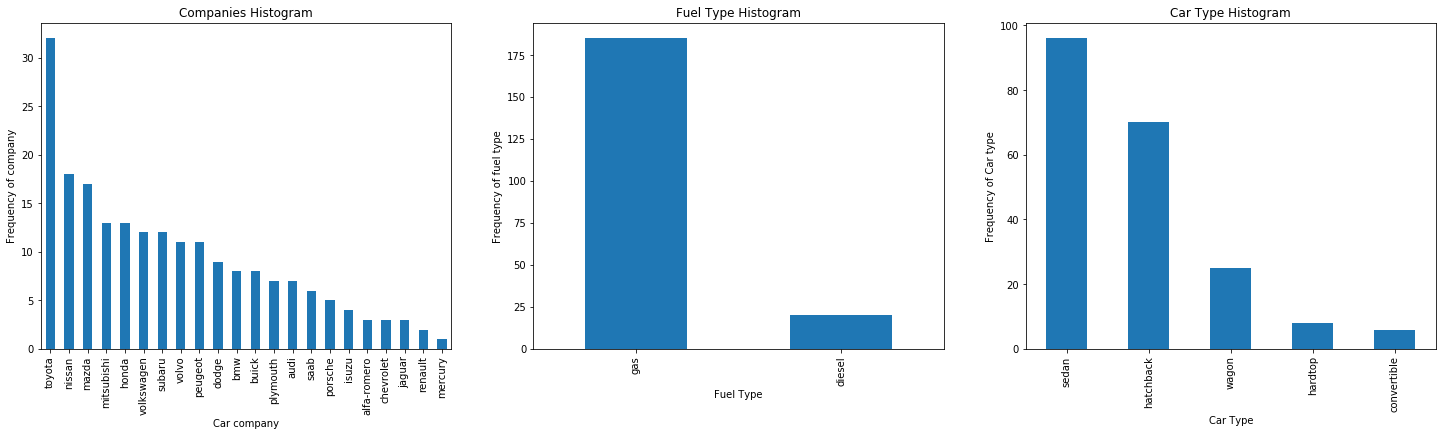

In [70]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = DF_AutoMob.companyName.value_counts().plot('bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = DF_AutoMob.fueltype.value_counts().plot('bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = DF_AutoMob.carbody.value_counts().plot('bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

#### top 3 inferneces we can make out of this 
#### Sedan is the most prefered , People prefer gas over disel cars amd toyota is most prefered car company

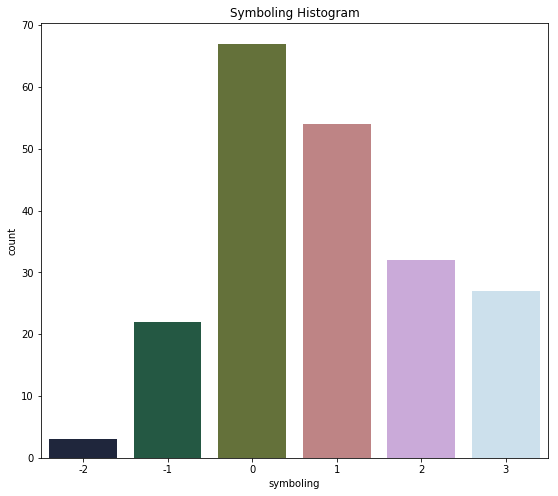

In [71]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(DF_AutoMob.symboling, palette=("cubehelix"))
plt.show()

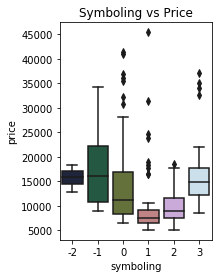

In [46]:
plt.subplot(1,2,1)
plt.title('Symboling vs Price')
sns.boxplot(x=DF_AutoMob.symboling, y=DF_AutoMob.price, palette=("cubehelix"))

plt.show()

#### it seems 0 and -1 has high number of values most cars which are sold falls under this

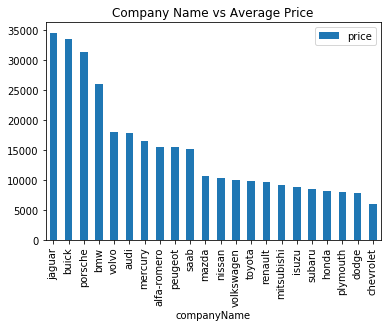

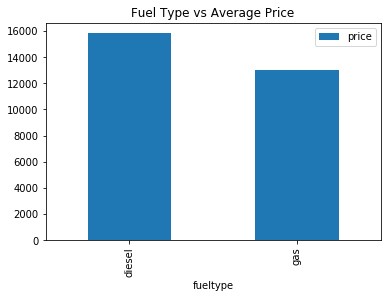

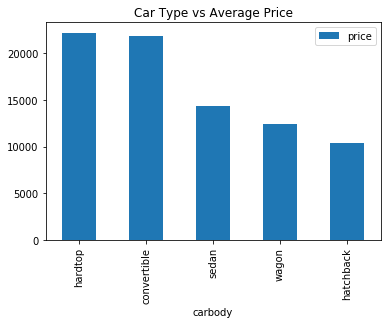

In [47]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(DF_AutoMob.groupby(['companyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(DF_AutoMob.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(DF_AutoMob.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

####  hardtop and convertible have higher average price.
####  Jaguar and Buick seem to have highest average price.
####  diesel has higher average price than gas.

### checking aspirations

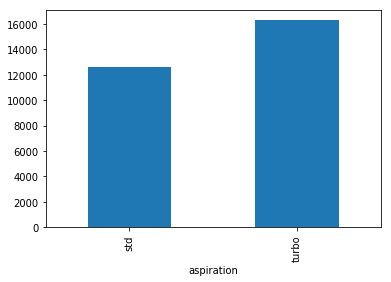

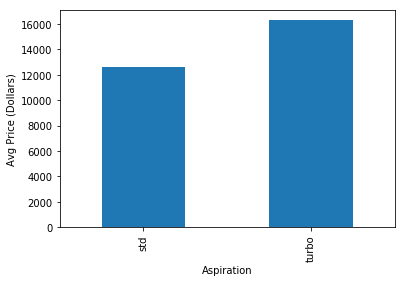

In [72]:
df_avg_price = DF_AutoMob[['aspiration','price']].groupby("aspiration", as_index = False).mean().rename(columns={'price':'aspir_avg_price'})
plt1 = df_avg_price.plot(x = 'aspiration', kind='bar',legend = False, sort_columns = True)
plt1.set_df_avg_price = DF_AutoMob[['aspiration','price']].groupby("aspiration", as_index = False).mean().rename(columns={'price':'aspir_avg_price'})
plt1 = df_avg_price.plot(x = 'aspiration', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Aspiration")
plt1.set_ylabel("Avg Price (Dollars)")
plt.show()

###  Aspiration with turbo has higher price range than the std

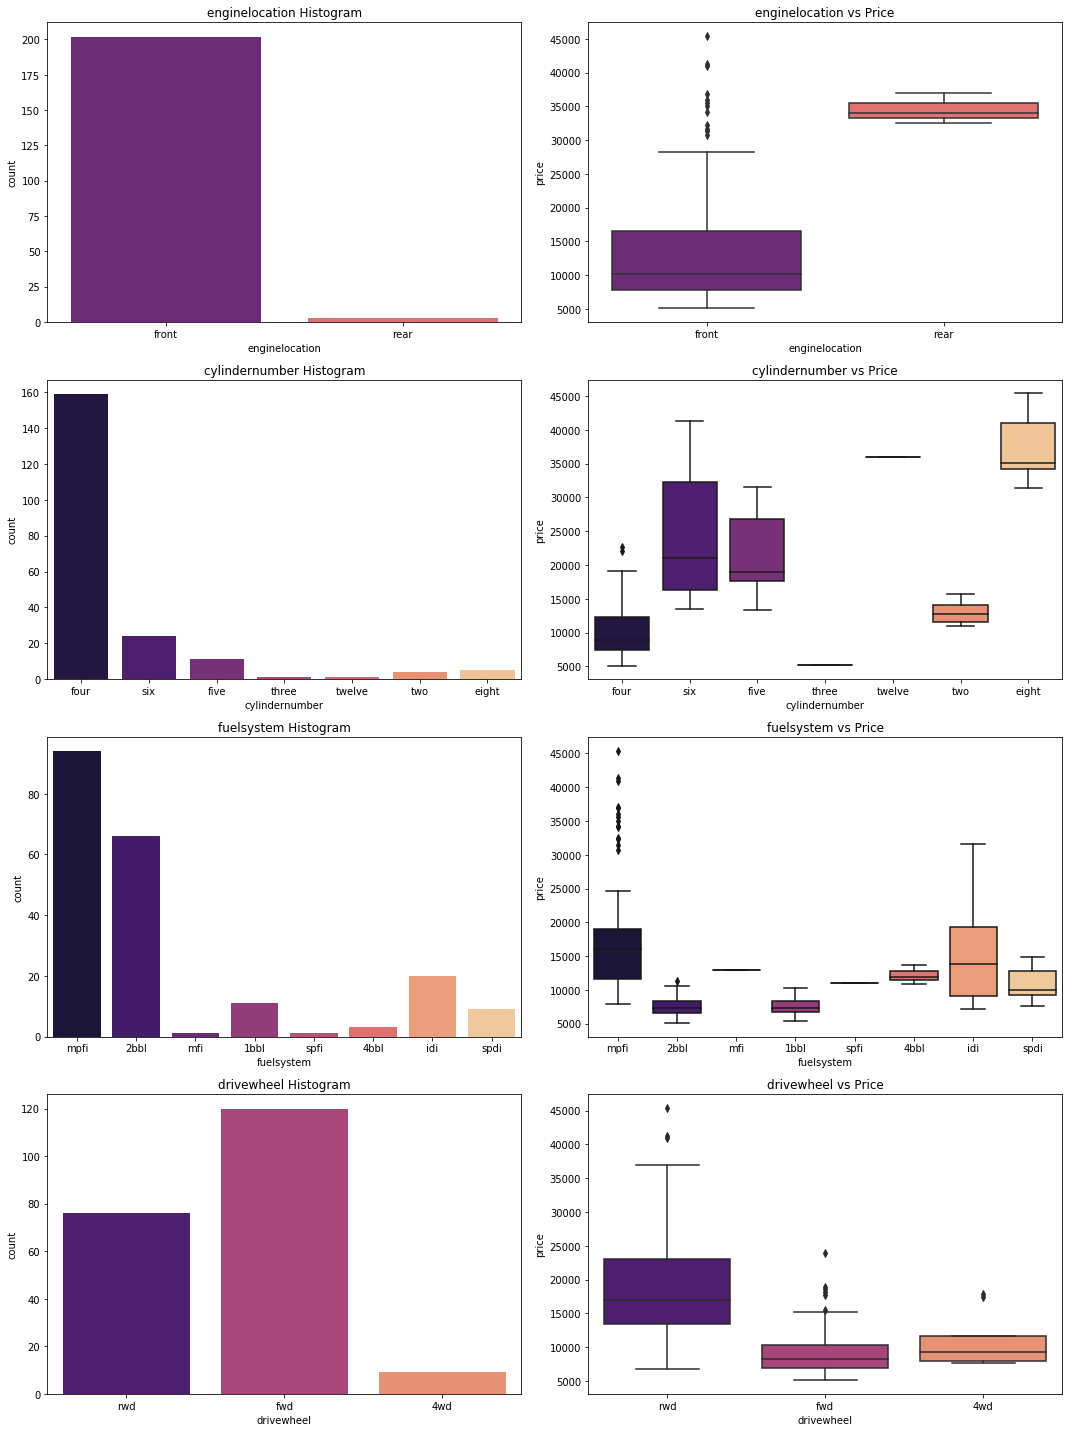

In [73]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(DF_AutoMob[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=DF_AutoMob[x], y=DF_AutoMob.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

#### a noticable difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.
#### common number of cylinders are four, six and five. Though eight cylinders have the highest price range.

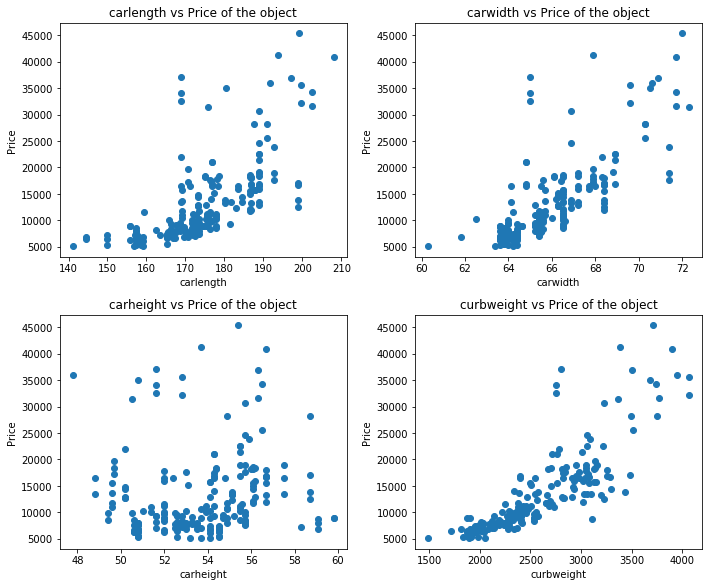

In [50]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(DF_AutoMob[x],DF_AutoMob['price'])
    plt.title(x+' vs Price of the object')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

### there is no significance of car's height with the price
### significance is there with width , length and height of the car

### New Features to derive

In [74]:
DF_AutoMob['fueleconomy'] = (0.55 * DF_AutoMob['citympg']) + (0.45 * DF_AutoMob['highwaympg'])

AttributeError: module 'seaborn' has no attribute 'scatterplot'

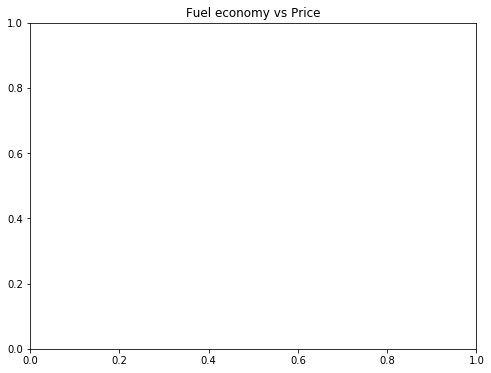

In [76]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=DF_AutoMob['fueleconomy'],y=DF_AutoMob['price'],hue=DF_AutoMob['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()


In [77]:
#DF_AutoMob['price'].value_counts()


DF_AutoMob['price'] = DF_AutoMob['price'].astype('int')
temp = DF_AutoMob
table = temp.groupby(['companyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='companyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
DF_AutoMob['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
DF_AutoMob.head()

,car_ID,symboling,companyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


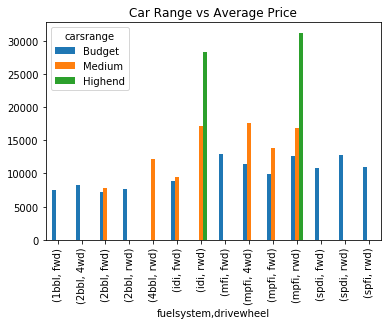

In [78]:
plt.figure(figsize=(24, 7))

df2 = pd.DataFrame(DF_AutoMob.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df2.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

### Variable of significance

In [ ]:
# Aspiration 
# Cylinder Number 
# Drivewheel 
# Curbweight 
# Car Length
# Car width
# Engine Size 
# Boreratio 
# Horse Power 
# Wheel base 

### Making a new dataframe of significant variables

In [79]:
DF3 = DF_AutoMob[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth']]
DF3.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4


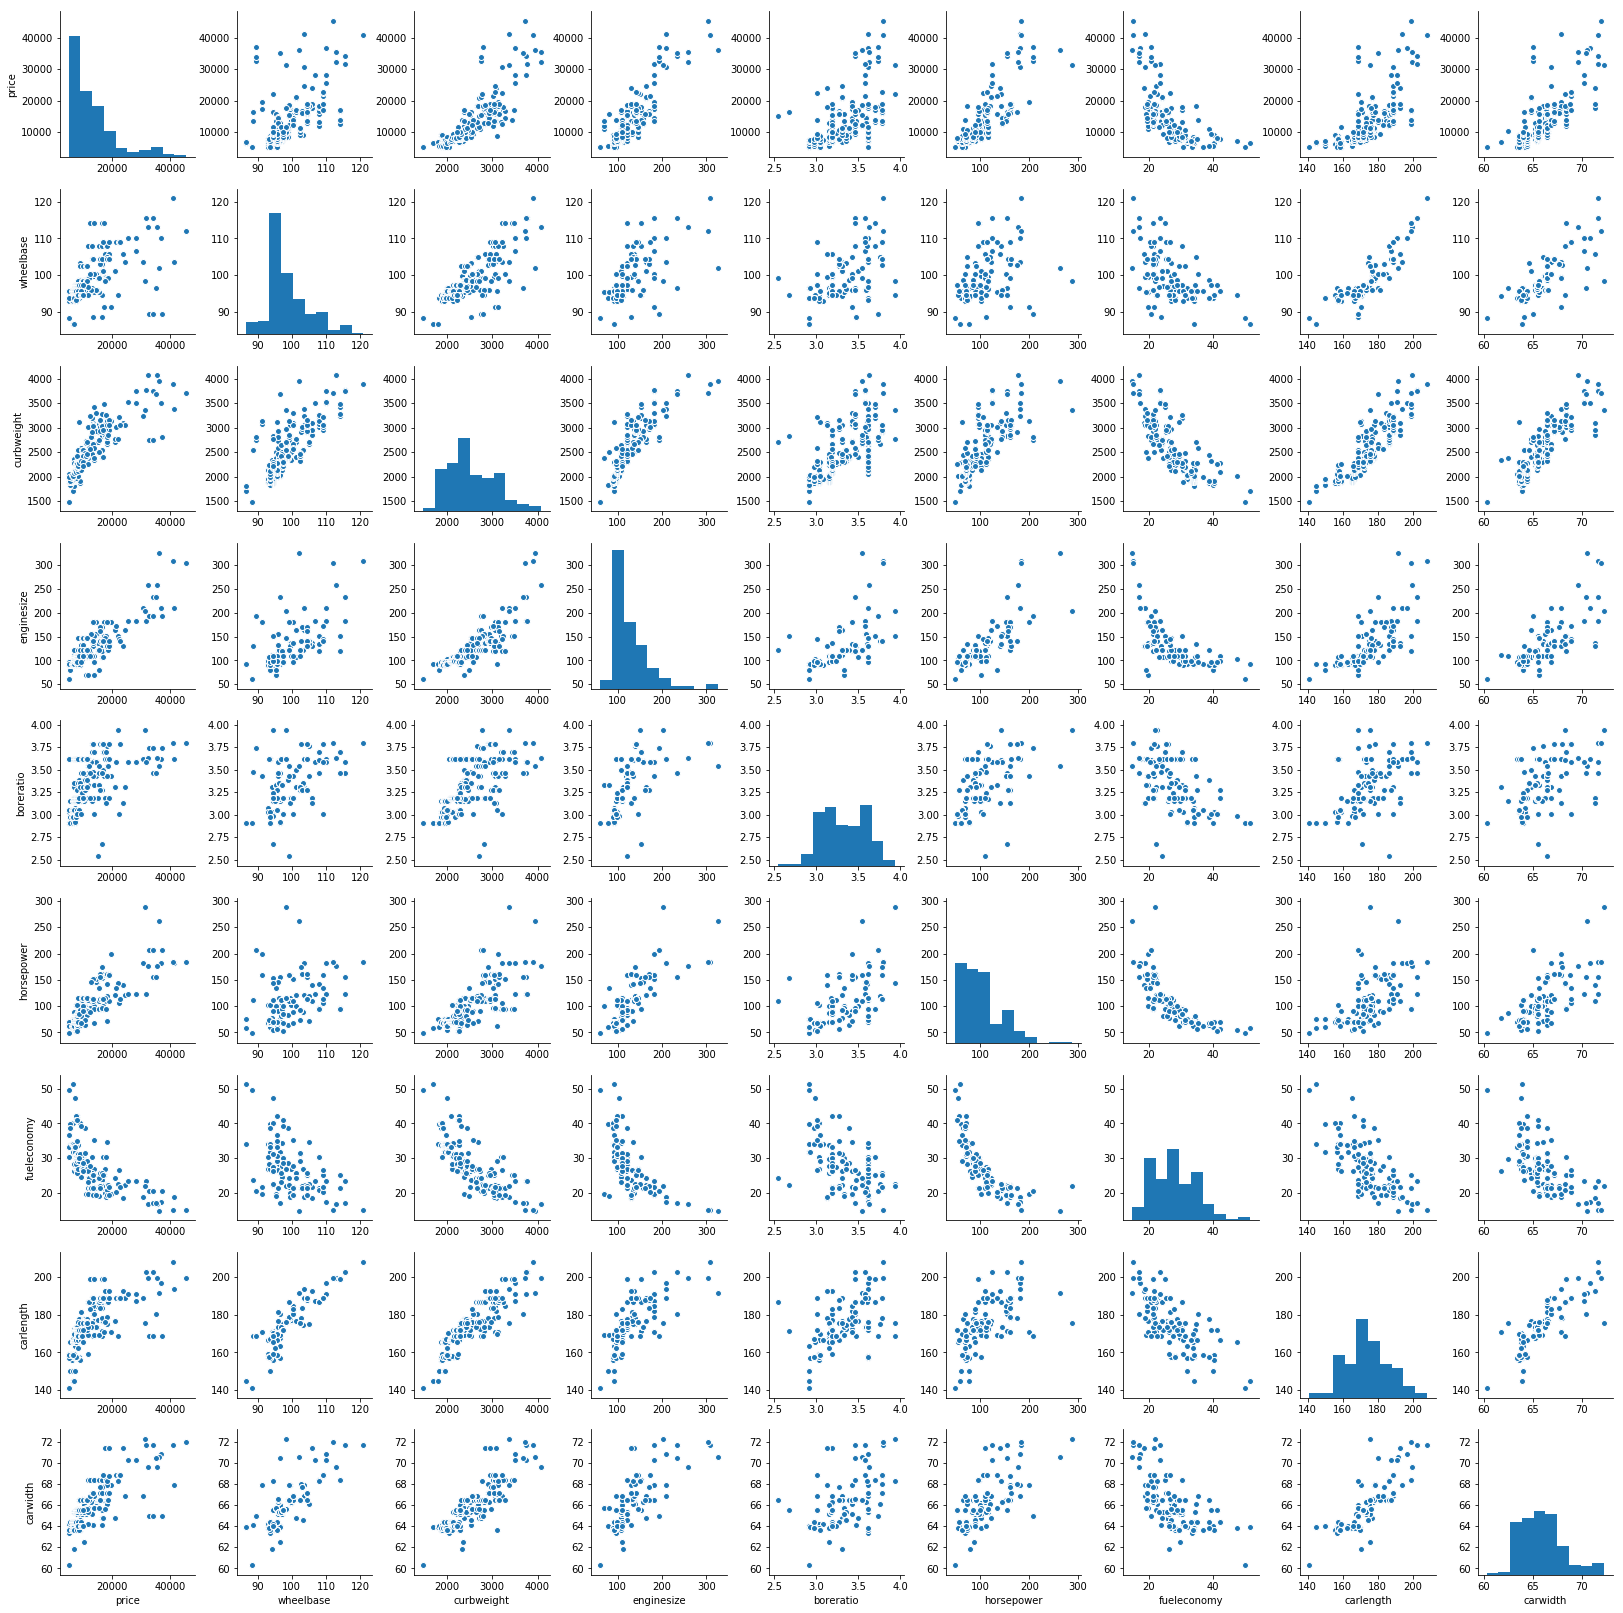

In [81]:
sns.pairplot(DF3)
plt.show()

In [82]:
cylnderno = pd.get_dummies(DF3['cylindernumber'], drop_first = True)

In [83]:
DF3 = pd.concat([DF3, cylnderno], axis = 1)

In [84]:
DF3.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,...,horsepower,fueleconomy,carlength,carwidth,five,four,six,three,twelve,two
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,...,111,23.70,168.8,64.1,0,1,0,0,0,0
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,...,111,23.70,168.8,64.1,0,1,0,0,0,0
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,...,154,22.15,171.2,65.5,0,0,1,0,0,0
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,...,102,26.70,176.6,66.2,0,1,0,0,0,0
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,...,115,19.80,176.6,66.4,1,0,0,0,0,0


In [85]:
engntype = pd.get_dummies(DF3['enginetype'], drop_first = True)

In [86]:
DF3 = pd.concat([DF3, engntype], axis = 1)

In [87]:
DF3.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,...,six,three,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,...,0,0,0,0,0,0,0,0,0,0
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,...,0,0,0,0,0,0,0,0,0,0
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,...,1,0,0,0,0,0,0,0,1,0
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,...,0,0,0,0,0,0,1,0,0,0
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,...,0,0,0,0,0,0,1,0,0,0


In [88]:
drvewheel = pd.get_dummies(DF3['drivewheel'], drop_first = True)

In [89]:
DF3 = pd.concat([DF3, drvewheel], axis = 1)

In [90]:
carbdy = pd.get_dummies(DF3['carbody'], drop_first = True)

In [91]:
DF3 = pd.concat([DF3, carbdy], axis = 1)

In [92]:
DF3.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,...,ohc,ohcf,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,...,0,0,0,0,0,1,0,0,0,0
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,...,0,0,0,0,0,1,0,0,0,0
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,...,0,0,1,0,0,1,0,1,0,0
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,...,1,0,0,0,1,0,0,0,1,0
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,...,1,0,0,0,0,0,0,0,1,0


In [94]:
aspration = pd.get_dummies(DF3['aspiration'], drop_first = True)

In [95]:
DF3 = pd.concat([DF3, aspration], axis = 1)

In [96]:
DF3.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,...,ohcf,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,...,0,0,0,0,1,0,0,0,0,0
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,...,0,0,0,0,1,0,0,0,0,0
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,...,0,1,0,0,1,0,1,0,0,0
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,...,0,0,0,1,0,0,0,1,0,0
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,...,0,0,0,0,0,0,0,1,0,0


In [97]:
#cross-cheking whether our code is following the K-1 rule
DF3.turbo.value_counts()

0    168
1     37
Name: turbo, dtype: int64

In [99]:
fultyp = pd.get_dummies(DF3['fueltype'], drop_first = True)

In [100]:
DF3 = pd.concat([DF3, fultyp], axis = 1)

In [104]:
DF3.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber'], axis = 1, inplace = True)

In [105]:
DF3.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,0,...,0,0,0,1,0,0,0,0,0,1
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,0,...,0,0,0,1,0,0,0,0,0,1
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,0,...,1,0,0,1,0,1,0,0,0,1
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,0,...,0,0,1,0,0,0,1,0,0,1
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
DF3.shape

### spliting data by training and testing set

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
np.random.seed(0)
df_train, df_test = train_test_split(DF3, train_size = 0.7, test_size = 0.3, random_state = 100)

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [109]:
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [110]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,0,...,0,0,1,0,0,0,1,0,0,1
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,0,...,0,0,0,1,0,1,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,0,...,0,0,0,1,0,1,0,0,0,1
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,0,...,0,0,0,1,0,0,0,0,0,1
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,0,...,0,0,0,1,0,0,0,1,1,1


In [111]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.062937,...,0.062937,0.027972,0.594406,0.349650,0.020979,0.342657,0.475524,0.132867,0.181818,0.909091
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.243703,...,0.243703,0.165472,0.492733,0.478536,0.143818,0.476266,0.501156,0.340624,0.387050,0.288490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


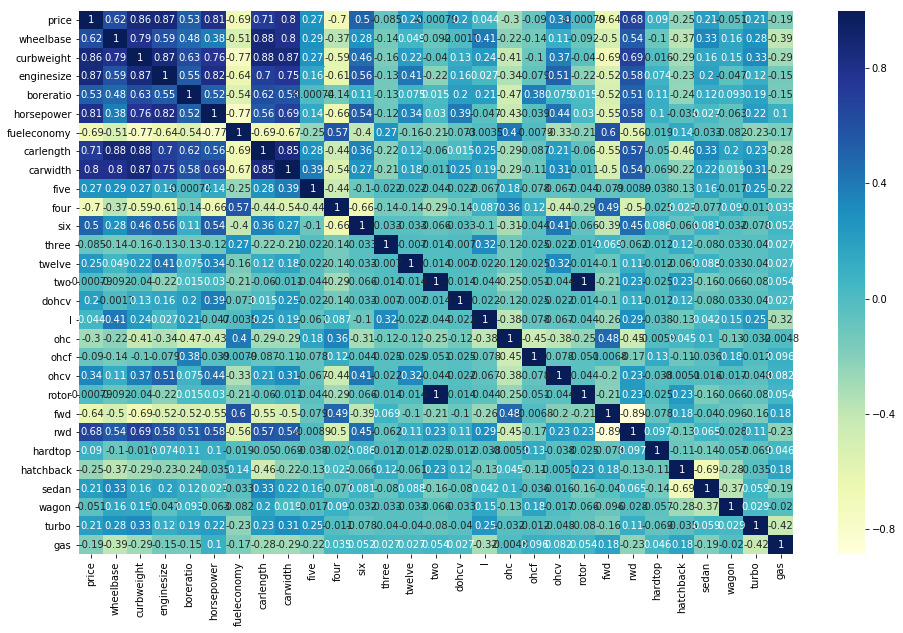

In [112]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

###  variables which are highly correlated to price are - curbweight, enginesize, horsepower,carwidth and highend

### dividing the data into into proper variables

In [127]:
y_train = df_train.pop('price')
X_train = df_train

KeyError: 'price'

### using recursive feature and linear regression model

In [128]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [129]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)           
rfe = rfe.fit(X_train, y_train)

In [130]:
X_train.columns

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'fueleconomy', 'carlength', 'carwidth', 'five', 'four', 'six', 'three',
       'twelve', 'two', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'fwd',
       'rwd', 'hardtop', 'hatchback', 'sedan', 'wagon', 'turbo', 'gas'],
      dtype='object')

In [131]:
col1 = X_train.columns[rfe.support_]

In [132]:
col1

Index(['wheelbase', 'curbweight', 'enginesize', 'horsepower', 'fueleconomy',
       'four', 'twelve', 'hatchback', 'sedan', 'wagon'],
      dtype='object')

In [133]:
X_train_rfe = X_train[col1]

### now using the stats model api method adding the constant variables

In [134]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [135]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [122]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     81.91
Date:                Sun, 16 Aug 2020   Prob (F-statistic):           1.26e-51
Time:                        12:30:58   Log-Likelihood:                 158.15
No. Observations:                 143   AIC:                            -294.3
Df Residuals:                     132   BIC:                            -261.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0291      0.061      0.479      0.633      -0.091       0.149
wheelbase       0.1371      0.076      1.797      0.075      -0.014       0.288
curbweight      0.3185      0.124      2.579      0.011       0.074       0.563
enginesize      0.2936      0.130      2.267      0.025       0.037       0.550
horsepower      0.3630      0.105      3.449      0.001       0.155       0.571
fueleconomy     0.1082      0.072      1.504      0.135      -0.034       0.251
four           -0.0959      0.022     -4.306      0.000      -0.140      -0.052
twelve         -0.0653      0.100     -0.653      0.515      -0.263       0.132
hatchback      -0.1356      0.038     -3.594      0.000      -0.210      -0.061
sedan          -0.1048      0.039     -2.716      0.007      -0.181      -0.028
wagon          -0.1528      0.042     -3.607      0.000      -0.237      -0.069
==============================================================================
Omnibus:                       25.192   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.439
Skew:                           0.396   Prob(JB):                     7.03e-27
Kurtosis:                       7.426   Cond. No.                         38.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### now calculating VIF

In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vifNew = pd.DataFrame()
X = X_train_rfe
vifNew['Features'] = X.columns
vifNew['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vifNew['VIF'] = round(vifNew['VIF'], 2)
vifNew = vifNew.sort_values(by = "VIF", ascending = False)
vifNew


,Features,VIF
0,const,76.00
2,curbweight,13.92
3,enginesize,8.20
9,sedan,7.65
8,hatchback,6.61
4,horsepower,6.20
1,wheelbase,5.03
10,wagon,4.26
5,fueleconomy,3.66
6,four,1.96


### p-vale of twelve seems to be higher than the significance value of 0.05, hence considering it as insignificant 


In [138]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

#### Now creating a function which accepts two input parameters and creates the model out of it as it is a monotonous job

In [139]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

In [140]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     91.36
Date:                Sun, 16 Aug 2020   Prob (F-statistic):           1.58e-52
Time:                        13:13:35   Log-Likelihood:                 157.92
No. Observations:                 143   AIC:                            -295.8
Df Residuals:                     133   BIC:                            -266.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0357      0.060      0.597      

In [141]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,73.89
2,curbweight,13.65
8,sedan,7.38
3,enginesize,6.93
7,hatchback,6.43
4,horsepower,6.19
1,wheelbase,4.96
9,wagon,4.07
5,fueleconomy,3.66
6,four,1.92


#### dropin curbweight because of its high VIF so as to avoid the over-fitting

In [142]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

In [143]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     97.29
Date:                Sun, 16 Aug 2020   Prob (F-statistic):           5.27e-52
Time:                        13:13:43   Log-Likelihood:                 154.09
No. Observations:                 143   AIC:                            -290.2
Df Residuals:                     134   BIC:                            -263.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0972      0.057      1.718      

### again calculating VIF

In [144]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.20
7,sedan,7.15
6,hatchback,6.28
3,horsepower,5.94
2,enginesize,4.96
8,wagon,4.07
4,fueleconomy,3.23
1,wheelbase,2.55
5,four,1.91


In [145]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

In [146]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sun, 16 Aug 2020   Prob (F-statistic):           1.05e-50
Time:                        13:13:59   Log-Likelihood:                 148.35
No. Observations:                 143   AIC:                            -280.7
Df Residuals:                     135   BIC:                            -257.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0192      0.053      0.360      

### droping fueleconomy variable as it is having high P-Value

In [147]:
X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)

#### creating the new model out of it

In [148]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     119.7
Date:                Sun, 16 Aug 2020   Prob (F-statistic):           9.23e-52
Time:                        13:14:04   Log-Likelihood:                 148.34
No. Observations:                 143   AIC:                            -282.7
Df Residuals:                     136   BIC:                            -261.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0151      0.036      0.422      0.6

In [149]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,23.58
2,enginesize,4.46
3,horsepower,3.81
4,four,1.88
1,wheelbase,1.79
5,hatchback,1.32
6,wagon,1.14


### now doing the residual analysis for the model

In [150]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5,0,'Errors done')

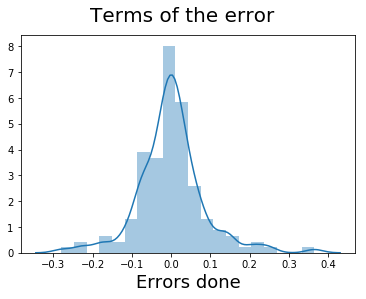

In [151]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Terms of the error', fontsize = 20)                 
plt.xlabel('Errors done', fontsize = 18)

In [152]:
num_vars2 = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars2] = scaler.fit_transform(df_test[num_vars2])


In [153]:
df_test.head(3)

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
160,0.058474,0.265306,0.132148,0.082969,0.515873,0.116129,1.000000,0.341732,0.200000,0,...,0,0,1,0,0,0,1,0,0,1
186,0.077398,0.311953,0.219125,0.131004,0.515873,0.212903,0.561694,0.426772,0.315789,0,...,0,0,1,0,0,0,1,0,0,1
59,0.086148,0.355685,0.271985,0.187773,0.674603,0.206452,0.508287,0.522835,0.421053,0,...,0,0,1,0,0,1,0,0,0,1


### again dividing the variables into two 

In [154]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

#### now will drop the variable const in X_test and will create the new dataframe out of it

In [155]:
X_train_new = X_train_new.drop('const',axis=1)

### using model to make prediction

In [156]:
X_test_new = X_test[X_train_new.columns]

In [157]:
X_test_new = sm.add_constant(X_test_new)

In [158]:
y_pred = lm.predict(X_test_new)

### now comparing the model  using r2_score

In [161]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.79836325921160733

Text(0,0.5,'y_pred')

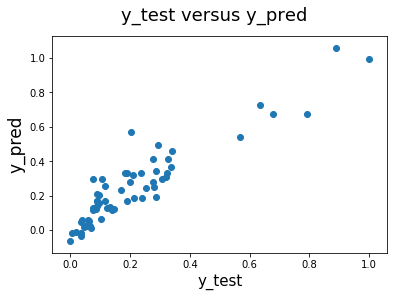

In [163]:
figur = plt.figure()
plt.scatter(y_test,y_pred)
figur.suptitle('y_test versus y_pred', fontsize=18)              
plt.xlabel('y_test', fontsize=15)                          
plt.ylabel('y_pred', fontsize=17)   